
# Assignment No 4b
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests. For this part you will be implemented randomized version of **Random Axis-Aligned** weak learner based Random Forest, i.e. you will be randomly selecting the feature from all set of features and than setting the threshold by randomly selecting a threshold.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## TODO: 

**Complete the code in files `randomForest.py`, `tree.py` and `weakLearner.py` by writing the missing code.**

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

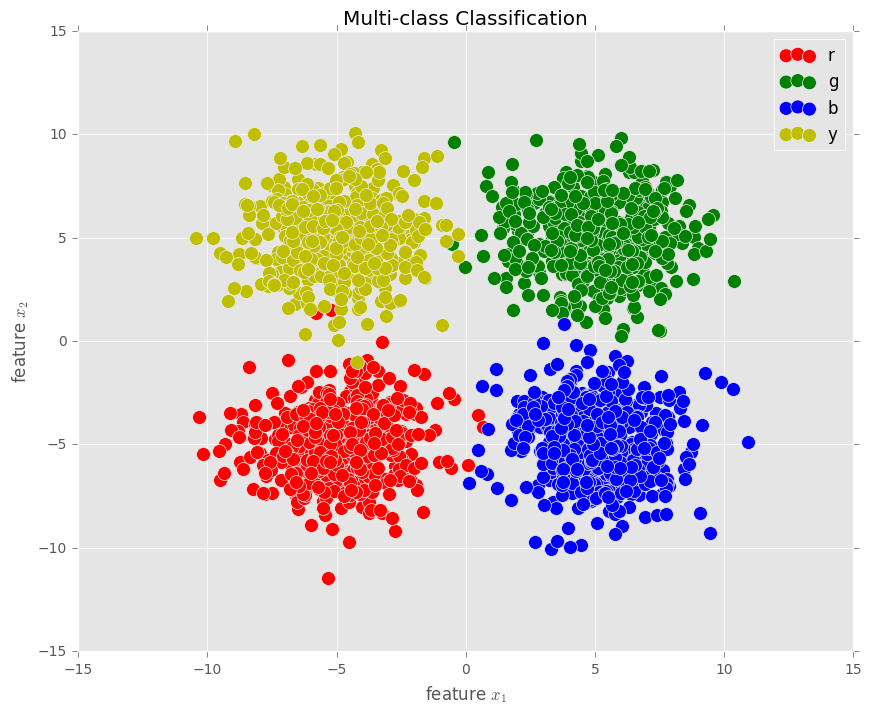

In [4]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1)),3*np.ones((nexamples/4,1)),4*np.ones((nexamples/4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples/4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples/4,1)),2*np.ones((ntexamples/4,1)),3*np.ones((ntexamples/4,1)),4*np.ones((ntexamples/4,1))))


In [9]:
import randomForest as rf
reload(rf)

<module 'randomForest' from 'randomForest.pyc'>

In [10]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random')

In [11]:
print X.shape, Y.shape

(2000, 2) (2000, 1)


In [12]:
#%debug
rfc.train(X,Y)

training new tree
currnode = (2000, 2), creating left node = (995, 2), right node = (1005, 2)
currnode = (995, 2), creating left node = (494, 2), right node = (501, 2)
currnode = (1005, 2), creating left node = (35, 2), right node = (970, 2)
currnode = (35, 2), creating left node = (13, 2), right node = (22, 2)
currnode = (13, 2), creating left node = (4, 2), right node = (9, 2)
currnode = (9, 2), creating left node = (6, 2), right node = (3, 2)
currnode = (6, 2), creating left node = (5, 2), right node = (1, 2)
currnode = (5, 2), creating left node = (2, 2), right node = (3, 2)
currnode = (22, 2), creating left node = (13, 2), right node = (9, 2)
currnode = (13, 2), creating left node = (4, 2), right node = (9, 2)
currnode = (9, 2), creating left node = (1, 2), right node = (8, 2)
currnode = (8, 2), creating left node = (2, 2), right node = (6, 2)
currnode = (970, 2), creating left node = (488, 2), right node = (482, 2)
training new tree
currnode = (2000, 2), creating left node = (104

weakLearner.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  feattest=np.unique(np.random.randint(low=0, high=X.shape[1], size=(self.nrandfeat)))


currnode = (5, 2), creating left node = (2, 2), right node = (3, 2)
currnode = (24, 2), creating left node = (11, 2), right node = (13, 2)
currnode = (11, 2), creating left node = (5, 2), right node = (6, 2)
currnode = (5, 2), creating left node = (2, 2), right node = (3, 2)
currnode = (13, 2), creating left node = (4, 2), right node = (9, 2)
currnode = (976, 2), creating left node = (460, 2), right node = (516, 2)
currnode = (516, 2), creating left node = (27, 2), right node = (489, 2)
training new tree
currnode = (2000, 2), creating left node = (999, 2), right node = (1001, 2)
currnode = (999, 2), creating left node = (495, 2), right node = (504, 2)
currnode = (1001, 2), creating left node = (498, 2), right node = (503, 2)
training new tree
currnode = (2000, 2), creating left node = (939, 2), right node = (1061, 2)
currnode = (939, 2), creating left node = (132, 2), right node = (807, 2)
currnode = (132, 2), creating left node = (63, 2), right node = (69, 2)
currnode = (63, 2), creat

In [13]:
len(rfc.trees)

10

In [14]:
# Training Confusion Matrix...
%pdb
Yp=rfc.predict(X)
print Y.shape, len(Yp)

t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned ON
(2000, 1) 2000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        498    0    0    2   500
2.0          0  499    0    1   500
3.0          1    3  496    0   500
4.0          1    0    0  499   500
All        500  502  496  502  2000

In [15]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

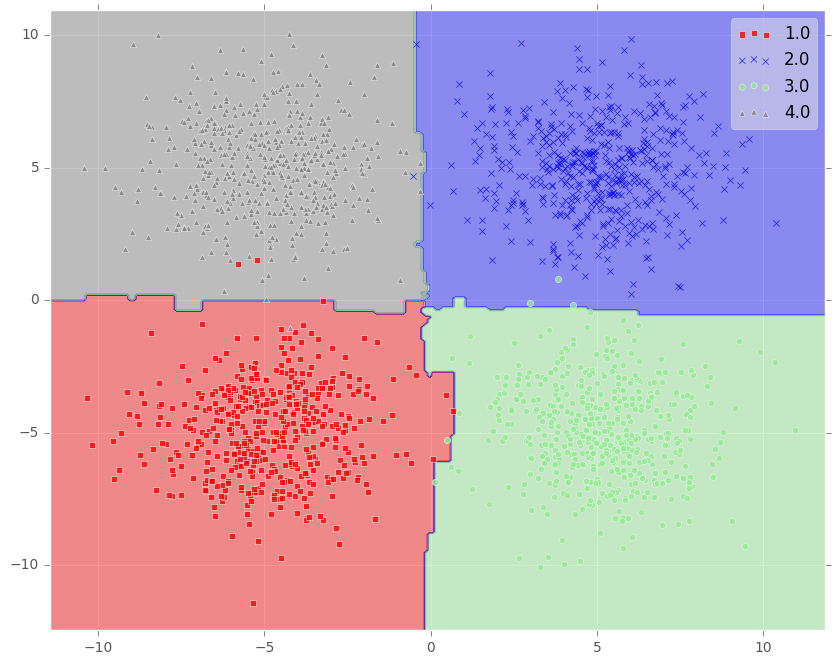

In [16]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-raa-10trees.svg',format='svg')

In [17]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print Ypt.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Yt)

(1000, 1) 1000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        249    0    0    1   250
2.0          0  250    0    0   250
3.0          4    1  245    0   250
4.0          1    1    0  248   250
All        254  252  245  249  1000

In [18]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)

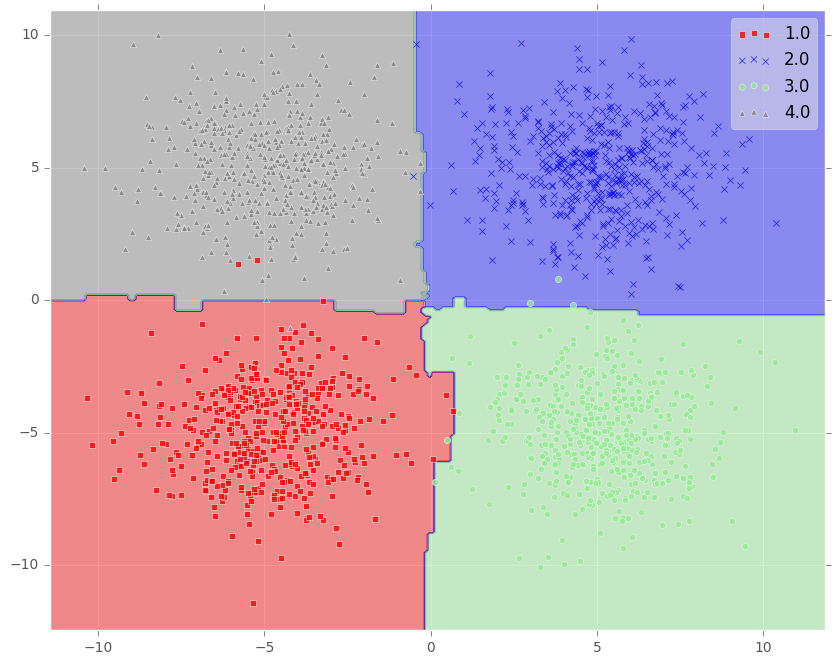

In [19]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

(10000, 2)
[1.0, 2.0, 3.0, 4.0]


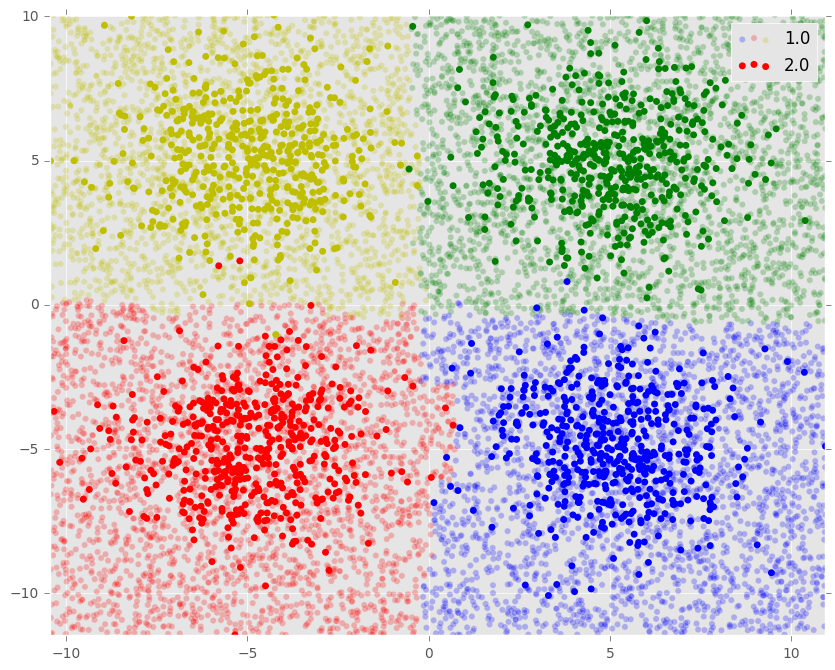

In [20]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

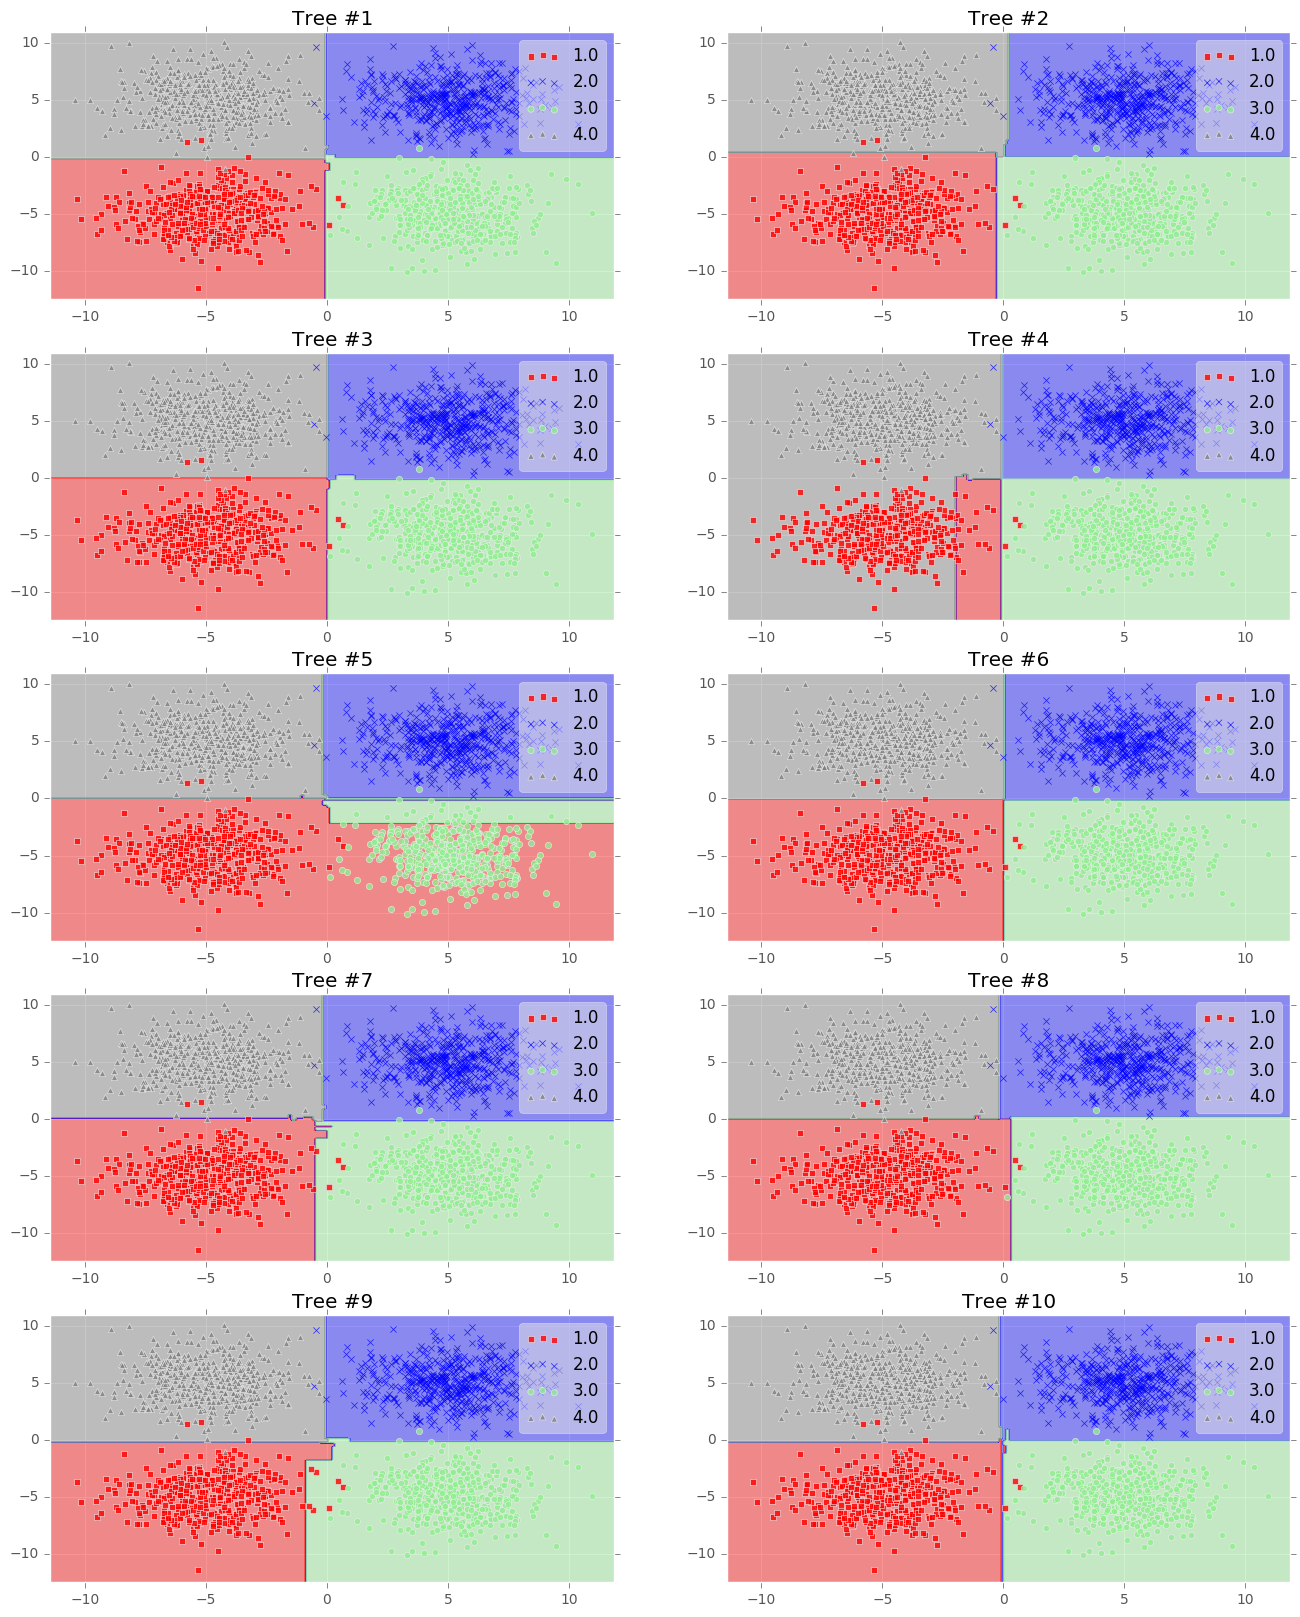

In [21]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

#### What Can You conclude

## Lets Run on Nonlinear Data, The Spherical Examples...

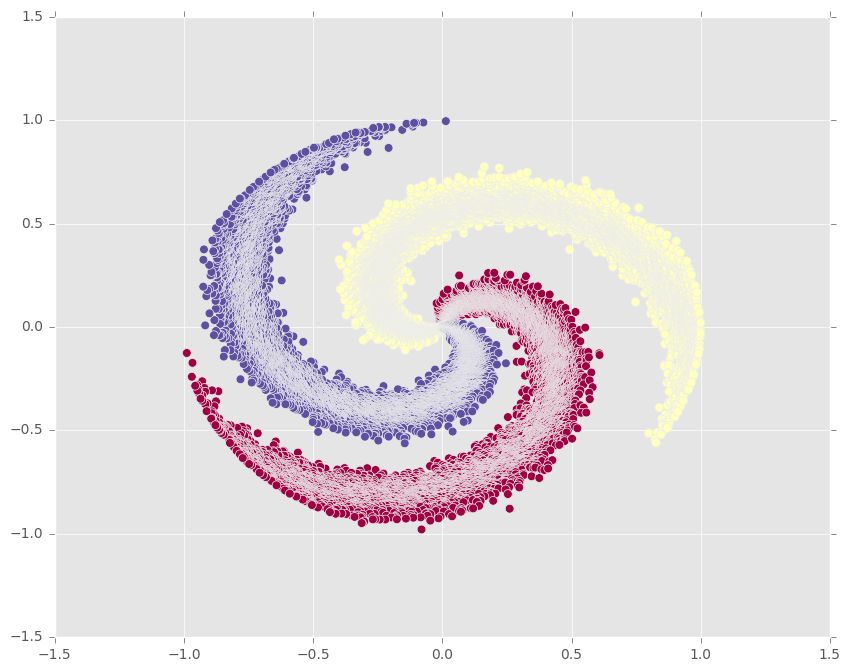

In [22]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

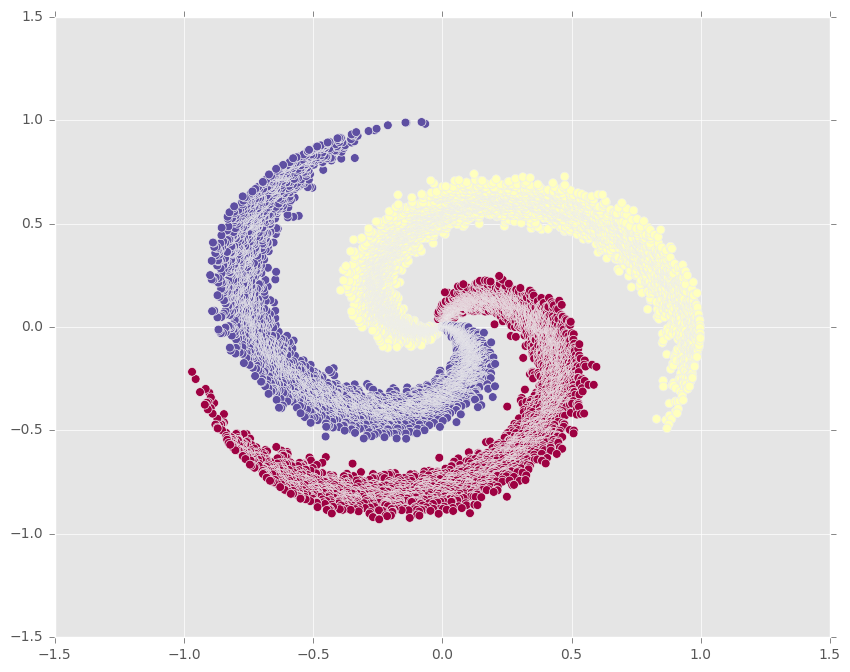

In [23]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [24]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random',usebagging=False)
rfc.train(X,Y)

training new tree
currnode = (30000, 2), creating left node = (21682, 2), right node = (8318, 2)
currnode = (21682, 2), creating left node = (5635, 2), right node = (16047, 2)
currnode = (5635, 2), creating left node = (1268, 2), right node = (4367, 2)
currnode = (1268, 2), creating left node = (1014, 2), right node = (254, 2)
currnode = (254, 2), creating left node = (47, 2), right node = (207, 2)
currnode = (47, 2), creating left node = (2, 2), right node = (45, 2)
currnode = (45, 2), creating left node = (43, 2), right node = (2, 2)
currnode = (43, 2), creating left node = (15, 2), right node = (28, 2)
currnode = (15, 2), creating left node = (10, 2), right node = (5, 2)
currnode = (10, 2), creating left node = (4, 2), right node = (6, 2)
currnode = (28, 2), creating left node = (23, 2), right node = (5, 2)
currnode = (23, 2), creating left node = (5, 2), right node = (18, 2)
currnode = (207, 2), creating left node = (15, 2), right node = (192, 2)
currnode = (16047, 2), creating lef

In [25]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted   0.0    1.0   2.0    All
Actual                             
0          9953      0    47  10000
1            10   9988     2  10000
2            16     56  9928  10000
All        9979  10044  9977  30000

In [26]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted   0.0   1.0   2.0    All
Actual                            
0          4977     0    23   5000
1             5  4992     3   5000
2             7    17  4976   5000
All        4989  5009  5002  15000

In [27]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

(10000, 2)
[0.0, 1.0, 2.0]


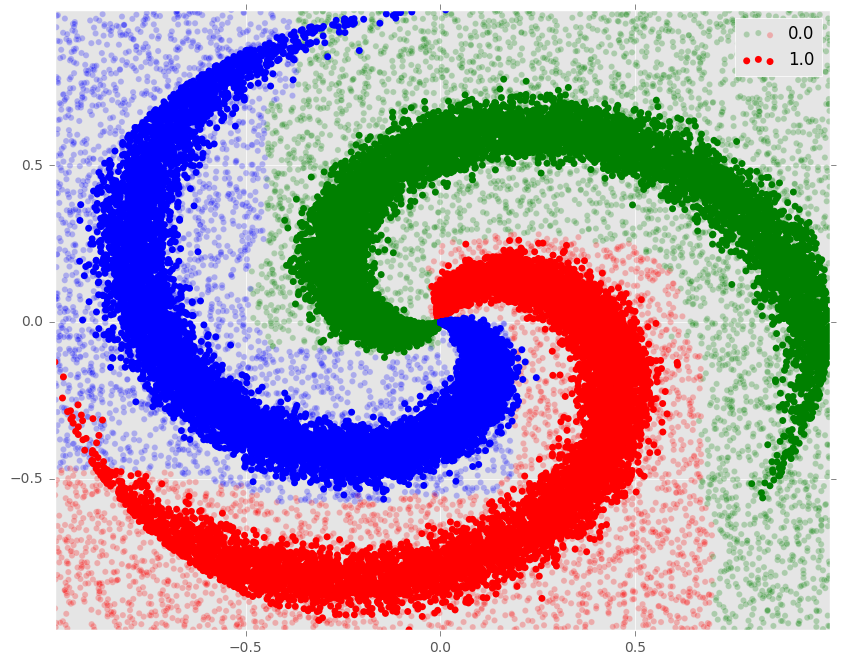

In [28]:
t.plot_points_range(rfc,X,Y)

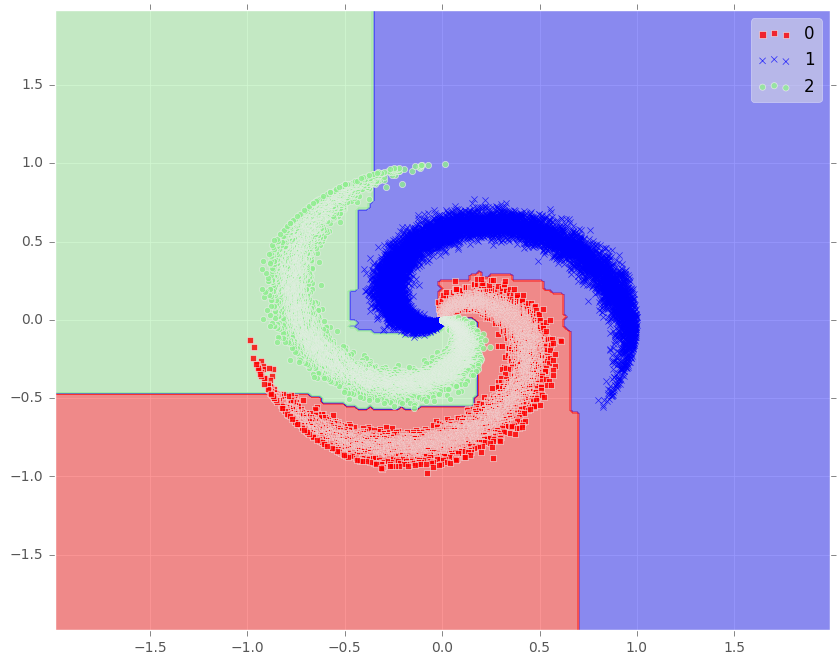

In [29]:
t.plot_decision_regions(X,Y,rfc)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

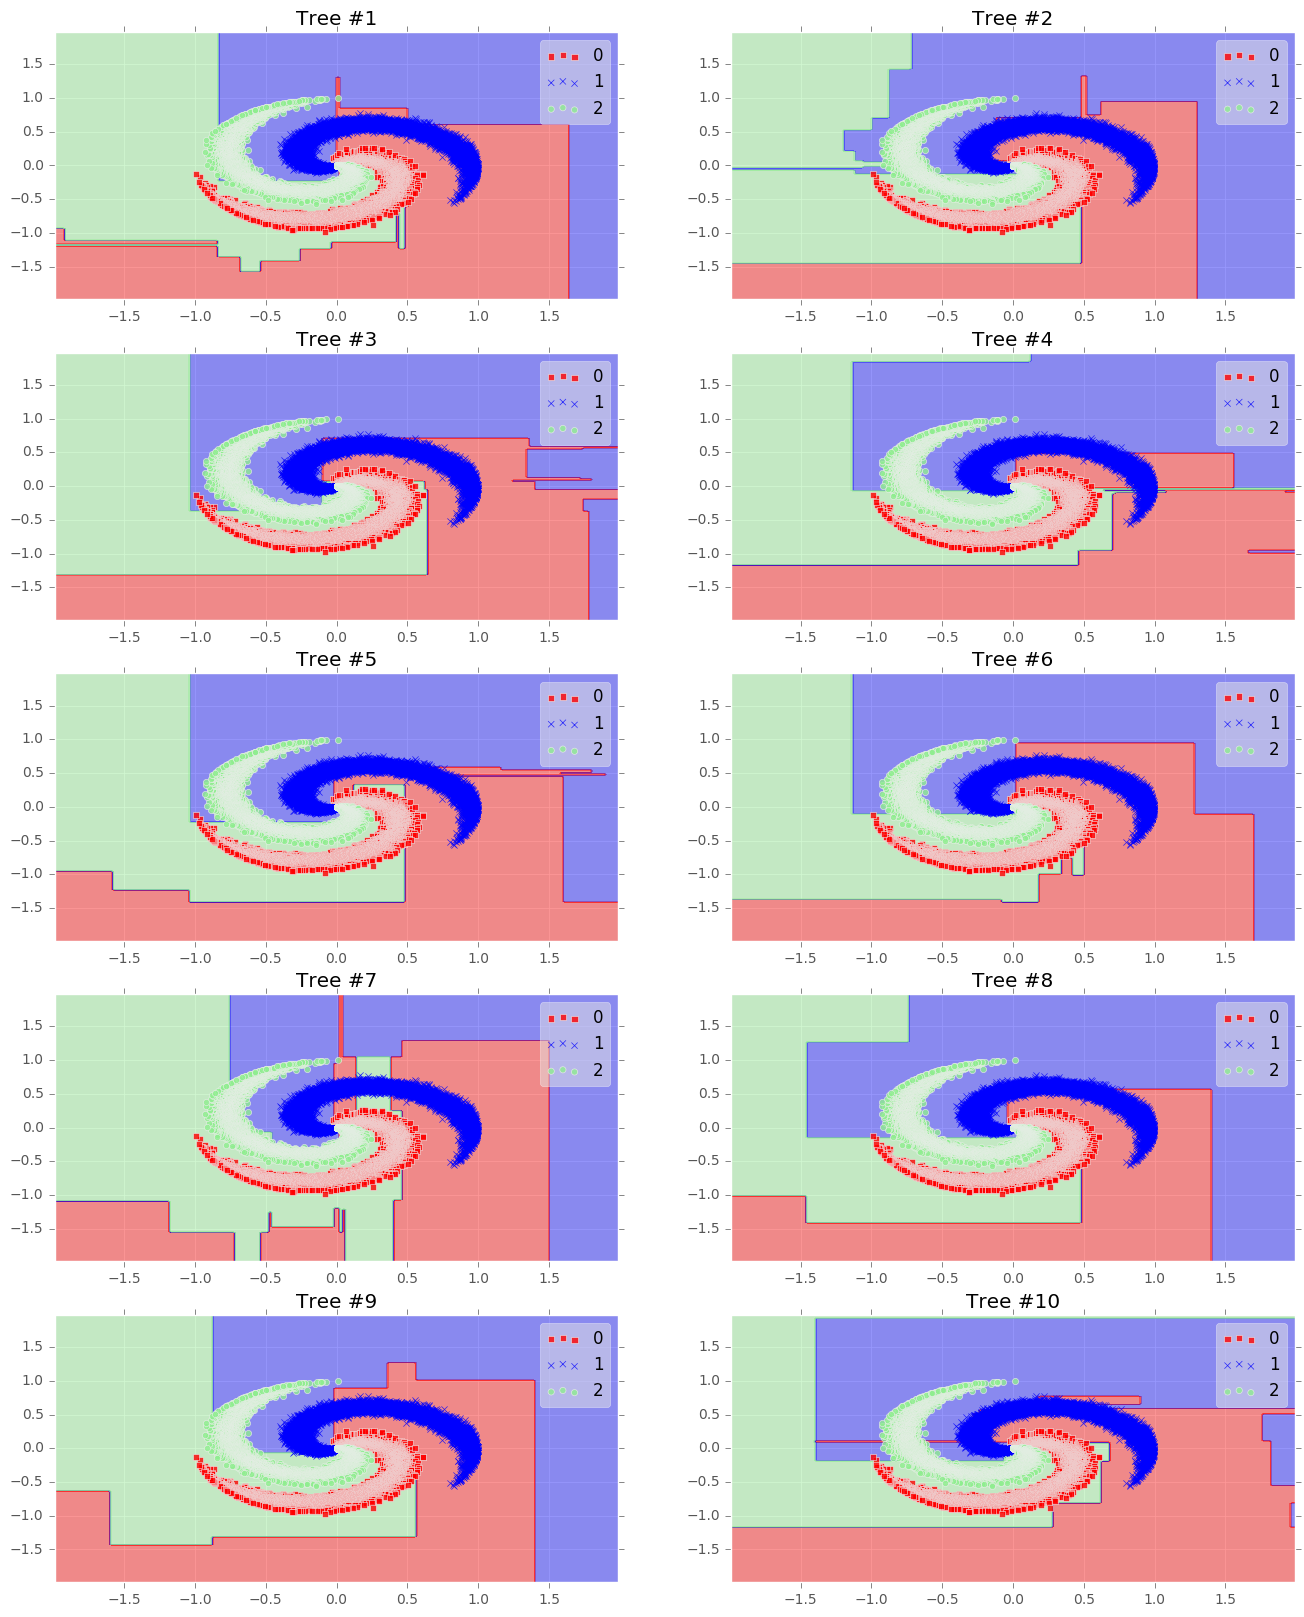

In [30]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

## TODO: Find Optimal Number of Trees for this data set, using cross validation...

In [31]:
ntreestest=np.arange(10, 50+1, 5)
accs=np.ones_like(ntreestest, dtype=np.float16)
for i, ntree in enumerate(ntreestest):
    print 'Training RandomForest with ntrees={}'.format(ntree)
    classifier=rf.RandomForest(ntrees=ntree, weaklearner='Axis-Aligned-Random')
    classifier.train(X,Y[:, np.newaxis])
    Ypt=classifier.predict(Xtest)
    Ypt=np.array(Ypt).flatten()
    accs[i]=np.sum(Ypt==Ytest)/float(Ytest.size)

Training RandomForest with ntrees=10
training new tree
currnode = (30000, 2), creating left node = (11541, 2), right node = (18459, 2)
currnode = (11541, 2), creating left node = (3341, 2), right node = (8200, 2)
currnode = (8200, 2), creating left node = (401, 2), right node = (7799, 2)
currnode = (401, 2), creating left node = (172, 2), right node = (229, 2)
currnode = (229, 2), creating left node = (64, 2), right node = (165, 2)
currnode = (64, 2), creating left node = (25, 2), right node = (39, 2)
currnode = (7799, 2), creating left node = (4070, 2), right node = (3729, 2)
currnode = (4070, 2), creating left node = (2780, 2), right node = (1290, 2)
currnode = (1290, 2), creating left node = (460, 2), right node = (830, 2)
currnode = (460, 2), creating left node = (438, 2), right node = (22, 2)
currnode = (438, 2), creating left node = (22, 2), right node = (416, 2)
currnode = (830, 2), creating left node = (182, 2), right node = (648, 2)
currnode = (182, 2), creating left node = (4

In [33]:
print 'Optimal number of trees = {}'.format(ntreestest[accs.argmax()])

Optimal number of trees = 25
